# Importamos las librerias

In [1]:
import os
import numpy as np
import glob
import shutil
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from sklearn.model_selection import train_test_split
import sklearn

In [233]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Please install GPU version of TF


# Cargamos la informacion

In [6]:
df = pd.read_csv(os.path.normpath('C:/Users/ctn24/PycharmProjects/ScoreModeling/PML_FPS.csv'), index_col=None)
df.columns

Index(['match_id', 'Date', 'League', 'club', 'Goals', 'Name', 'jersey_num',
       'pos_left', 'pos_top', 'height_cm', 'weight_kg', 'overall', 'potential',
       'weak_foot', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'int_work_att', 'int_work_def', 'left',
       'right', '

In [7]:
df.info(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   match_id                    7600 non-null   int64  
 1   Date                        7600 non-null   object 
 2   League                      7600 non-null   object 
 3   club                        7600 non-null   object 
 4   Goals                       7600 non-null   int64  
 5   Name                        7600 non-null   object 
 6   jersey_num                  7600 non-null   int64  
 7   pos_left                    7600 non-null   int64  
 8   pos_top                     7600 non-null   int64  
 9   height_cm                   7600 non-null   int64  
 10  weight_kg                   7600 non-null   int64  
 11  overall                     7600 non-null   int64  
 12  potential                   7600 non-null   int64  
 13  weak_foot                   7600 

In [8]:
matches_df = df.drop(['Date', 'League', 'club', 'Name', 'jersey_num'], axis=1)

In [9]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   match_id                    7600 non-null   int64  
 1   Goals                       7600 non-null   int64  
 2   pos_left                    7600 non-null   int64  
 3   pos_top                     7600 non-null   int64  
 4   height_cm                   7600 non-null   int64  
 5   weight_kg                   7600 non-null   int64  
 6   overall                     7600 non-null   int64  
 7   potential                   7600 non-null   int64  
 8   weak_foot                   7600 non-null   int64  
 9   pace                        7600 non-null   int64  
 10  shooting                    7600 non-null   int64  
 11  passing                     7600 non-null   int64  
 12  dribbling                   7600 non-null   int64  
 13  defending                   7600 

In [10]:
matches_df.describe()

,match_id,Goals,pos_left,pos_top,height_cm,weight_kg,overall,potential,weak_foot,pace,...,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,int_work_att,int_work_def,left,right,away,home
count,7600.000000,7600.000000,7600.000000,7600.0000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,...,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,189.500000,1.282895,5.515132,4.0000,182.210921,76.616974,75.225132,78.092237,3.122105,71.147500,...,60.860526,57.388026,61.415789,58.807368,1.305000,1.233158,0.248684,0.751316,0.500000,0.500000
std,109.703389,1.184504,3.701635,2.5537,6.689796,7.380812,5.186454,4.813899,0.659657,12.287363,...,13.826116,20.469810,20.251011,20.410816,0.553852,0.581873,0.432279,0.432279,0.500033,0.500033
min,0.000000,0.000000,0.000000,0.0000,162.000000,60.000000,12.000000,62.000000,1.000000,23.000000,...,21.000000,13.000000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.750000,0.000000,2.000000,2.0000,178.000000,72.000000,72.000000,75.000000,3.000000,66.000000,...,51.000000,37.000000,45.000000,40.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,189.500000,1.000000,5.500000,4.0000,183.000000,76.000000,75.000000,78.000000,3.000000,73.000000,...,62.000000,66.000000,71.000000,67.000000,1.000000,1.000000,0.000000,1.000000,0.500000,0.500000
75%,284.250000,2.000000,9.000000,6.0000,187.000000,82.000000,79.000000,82.000000,3.000000,79.000000,...,71.000000,74.000000,77.000000,75.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000
max,379.000000,8.000000,11.000000,8.0000,201.000000,95.000000,88.000000,90.000000,5.000000,96.000000,...,95.000000,87.000000,90.000000,86.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
matches_df.groupby(['match_id','home']).mean()

Goals  pos_left  pos_top  height_cm  weight_kg  overall  \
match_id home                                                            
0        0.0     0.0       9.3      4.0      182.7       76.6     69.2   
         1.0     3.0       2.1      4.0      178.9       70.0     78.9   
1        0.0     2.0       8.4      4.0      183.1       77.1     76.9   
         1.0     1.0       2.8      4.0      182.0       75.9     74.7   
2        0.0     1.0       9.3      4.0      183.3       77.7     74.3   
...              ...       ...      ...        ...        ...      ...   
377      1.0     1.0       2.1      4.0      184.6       78.2     76.7   
378      0.0     2.0       9.3      4.0      185.1       77.9     73.1   
         1.0     2.0       2.1      4.0      180.7       79.1     72.6   
379      0.0     1.0       8.4      4.0      181.2       76.1     83.2   
         1.0     2.0       2.0      4.0      181.7       75.4     74.1   

               potential  weak_foot  pace  shooting  ...  mentality_vision  \
match_id home                                        ...                     
0        0.0        71.3        3.2  70.1      57.5  ...              63.3   
         1.0        82.2        3.2  70.9      64.2  ...              69.2   
1        0.0        80.1        3.2  74.3      64.8  ...              69.6   
         1.0        77.7        2.9  71.5      60.8  ...              62.7   
2        0.0        77.7        3.1  71.2      60.4  ...              61.1   
...                  ...        ...   ...       ...  ...               ...   
377      1.0        80.9        3.2  73.7      65.4  ...              70.3   
378      0.0        75.4        3.0  70.1      57.4  ...              58.5   
         1.0        75.5        3.0  69.3      61.4  ...              62.3   
379      0.0        84.3        3.3  77.8      65.0  ...              71.4   
         1.0        76.5        2.9  71.4      60.9  ...              65.4   

               mentality_penalties  defending_marking  \
match_id home                                           
0        0.0                  53.4               54.6   
         1.0                  65.5               57.0   
1        0.0                  64.4               52.9   
         1.0                  62.0               54.6   
2        0.0                  60.4               56.6   
...                            ...                ...   
377      1.0                  65.6               52.5   
378      0.0                  59.1               56.2   
         1.0                  66.1               57.9   
379      0.0                  64.4               58.2   
         1.0                  64.9               59.6   

               defending_standing_tackle  defending_sliding_tackle  \
match_id home                                                        
0        0.0                        55.3                      54.5   
         1.0                        62.5                      59.8   
1        0.0                        61.2                      55.8   
         1.0                        61.1                      58.6   
2        0.0                        61.6                      61.7   
...                                  ...                       ...   
377      1.0                        59.2                      53.8   
378      0.0                        59.6                      56.1   
         1.0                        63.2                      60.1   
379      0.0                        59.7                      60.4   
         1.0                        60.5                      60.0   

               int_work_att  int_work_def  left  right  away  
match_id home                                                 
0        0.0            1.3           1.4   0.4    0.6   1.0  
         1.0            1.6           1.3   0.2    0.8   0.0  
1        0.0            1.4           0.9   0.2    0.8   1.0  
         1.0            1.2           1.1   0.4    0.6   0.0  
2     

Se observa como en 'home' los equipos meten 35% mas goles.

In [12]:
matches_df.groupby('home').mean()

,match_id,Goals,pos_left,pos_top,height_cm,weight_kg,overall,potential,weak_foot,pace,...,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,int_work_att,int_work_def,left,right,away
home,,,,,,,,,,,,,,,,,,,,,
0.0,189.5,1.092105,8.730789,4.0,182.219737,76.607632,75.183947,78.058158,3.121316,71.109474,...,64.457105,60.707632,57.623158,61.648421,59.016579,1.305263,1.233158,0.244737,0.755263,1.0
1.0,189.5,1.473684,2.299474,4.0,182.202105,76.626316,75.266316,78.126316,3.122895,71.185526,...,64.748684,61.013421,57.152895,61.183158,58.598158,1.304737,1.233158,0.252632,0.747368,0.0


### Convertimos las coordenadas de los jugadores en una "imagen"

#### Le quito los primeros 4 features: match id, goals, pos left y pos top

In [13]:
num_matches = len(matches_df.groupby(['match_id']))
num_matches

380

In [14]:
goals_arr = matches_df['Goals'].to_numpy().reshape((num_matches,20))
matches_arr = matches_df.drop(columns='match_id').to_numpy().reshape((num_matches,20,48))

In [15]:
left_cord = matches_arr[:,:,1]
top_cord = matches_arr[:,:,2]

matches_arr_cln = matches_arr.copy()
matches_arr_cln = matches_arr_cln[:,:,3:]
matches_arr_cln.shape

(380, 20, 45)

### Normalizamos los datos
Usamos el MaxAbsScaler que hace una escala con el valor absoluto de cada feature (4,10,7) -> (0.4,1,0.7) 
Y como son todos valores positivos, no afecta.

In [16]:
matches_norm = sklearn.preprocessing.MaxAbsScaler().fit_transform(matches_arr_cln.reshape(7600,45)).reshape(380,20,45)
matches_norm[0,:,0]

array([0.87064677, 0.8358209 , 0.91044776, 0.88557214, 0.88557214,
       0.98507463, 0.88557214, 0.87064677, 0.85074627, 0.92039801,
       0.88557214, 0.92537313, 0.92537313, 0.88557214, 0.91044776,
       0.91044776, 0.960199  , 0.88059701, 0.89054726, 0.91542289])

In [17]:
# matches_arr_cln.reshape(7600,45)[:,1]

In [18]:
#sklearn.preprocessing.MinMaxScaler().fit_transform(matches_arr_cln.reshape(7600,45)).reshape(380,20,45)[0,:,0]

In [19]:
#sklearn.preprocessing.normalize(matches_arr_cln.reshape(7600,45), norm='l2').reshape(380,20,45)[0,:,0]

In [20]:
#matches_arr_cln[0,:,0]

In [21]:
pd.DataFrame(matches_norm.reshape(7600,45)).describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,...,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000,7600.000000
mean,0.906522,0.806494,0.854831,0.867692,0.624421,0.741120,0.673610,0.752950,0.764641,0.695478,...,0.640637,0.659632,0.682398,0.683807,0.652500,0.616579,0.248684,0.751316,0.500000,0.500000
std,0.033283,0.077693,0.058937,0.053488,0.131931,0.127993,0.162927,0.115028,0.118378,0.209419,...,0.145538,0.235285,0.225011,0.237335,0.276926,0.290937,0.432279,0.432279,0.500033,0.500033
min,0.805970,0.631579,0.136364,0.688889,0.200000,0.239583,0.288889,0.386364,0.362637,0.252874,...,0.221053,0.149425,0.188889,0.174419,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.885572,0.757895,0.818182,0.833333,0.600000,0.687500,0.555556,0.670455,0.703297,0.471264,...,0.536842,0.425287,0.500000,0.465116,0.500000,0.500000,0.000000,1.000000,0.000000,0.000000
50%,0.910448,0.800000,0.852273,0.866667,0.600000,0.760417,0.711111,0.772727,0.791209,0.793103,...,0.652632,0.758621,0.788889,0.779070,0.500000,0.500000,0.000000,1.000000,0.500000,0.500000
75%,0.930348,0.863158,0.897727,0.911111,0.600000,0.822917,0.800000,0.840909,0.835165,0.862069,...,0.747368,0.850575,0.855556,0.872093,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Los datos de entrada del modelo deben ser tipo (128, 128, 3) -> (pixeles, pixeles, canales de color)

En nuestro caso, (top, left, features).

In [212]:
feat_num = len(matches_norm[0,0,:])
lineup = np.zeros((num_matches, 9, 12, feat_num), dtype=float)
lineup[0,:,:,44],lineup.shape, matches_norm.shape, left_cord.shape, top_cord.shape, goals_arr.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 (380, 9, 12, 45),
 (380, 20, 45),
 (380, 20),
 (380, 20),
 (380, 20))

In [184]:
matches_norm[1,:,1], lineup[1,:,:,1]

(array([0.86315789, 0.87368421, 0.78947368, 0.70526316, 0.82105263,
        0.73684211, 0.86315789, 0.83157895, 0.8       , 0.70526316,
        0.86315789, 0.84210526, 0.84210526, 0.74736842, 0.91578947,
        0.71578947, 0.76842105, 0.75789474, 0.75789474, 0.90526316]),
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [185]:
top_cord[0,0].astype(int),left_cord[0,0].astype(int)

(6, 2)

In [219]:
###### (42000, 28, 28, 1) ex. input
###### (380, 20, 45) matches_norm
###### (360, 20)
for i in range(num_matches):
    for j in range(20):
        lineup[i,top_cord[i,j].astype(int), left_cord[i,j].astype(int), :] = matches_norm[i,j,:]
#lineup[3,:,:,32]

In [220]:
goals_arr[0,:10], goals_arr[0,10:]

(array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

#### Se obtienen los labels goles_lbls

In [221]:
goals_lbl = np.zeros((num_matches,3), dtype=int) # Number of matches, (Home Goals, Visit Goals, Goal Dif)
for i in range(num_matches):
    goals_lbl[i, 0] = goals_arr[i,0] # Home Goals
    goals_lbl[i, 1] = goals_arr[i,-1]  # Visit Goals
    goals_lbl[i, 2] = goals_arr[i,0] - goals_arr[i,-1] # Dif Goals (H-V)
    
goals_lbl

array([[ 3,  0,  3],
       [ 1,  2, -1],
       [ 2,  1,  1],
       ...,
       [ 1,  2, -1],
       [ 2,  2,  0],
       [ 2,  1,  1]])

## Finalmenchi

In [222]:
model = Sequential()

#(42000, 28, 28, 1) ex. input image
#input_shape=(380, 9, 12, 45)
model.add(Conv2D(180, (2, 2), padding='same', activation='relu', input_shape=(9,12, 45))) 
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(Conv2D(240, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(Conv2D(360, (3,3), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(90, activation='relu'))

model.add(Dense(1,activation='linear'))


In [223]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['acc'])

In [224]:
lineup.shape

(380, 9, 12, 45)

In [225]:
Xset_norm = lineup
Yset = goals_lbl[:,2]

In [226]:
x_train, x_test, y_train, y_test=train_test_split(Xset_norm, Yset, test_size=0.15)

epochs = 150
history = model.fit(x_train, y_train, verbose=1, validation_data=(x_test,y_test),  batch_size = 5, epochs = epochs)


Train on 323 samples, validate on 57 samples
Epoch 1/150
323/323 [==============================] - 2s 5ms/sample - loss: 3.2041 - accuracy: 0.2043 - val_loss: 2.3877 - val_accuracy: 0.2632
Epoch 2/150
323/323 [==============================] - 1s 3ms/sample - loss: 2.9212 - accuracy: 0.2260 - val_loss: 2.3114 - val_accuracy: 0.3158
Epoch 3/150
323/323 [==============================] - 1s 3ms/sample - loss: 2.9138 - accuracy: 0.2415 - val_loss: 2.5308 - val_accuracy: 0.3509
Epoch 4/150
323/323 [==============================] - 1s 4ms/sample - loss: 2.8325 - accuracy: 0.2198 - val_loss: 2.2775 - val_accuracy: 0.2982
Epoch 5/150
323/323 [==============================] - 1s 4ms/sample - loss: 2.9228 - accuracy: 0.2322 - val_loss: 2.3999 - val_accuracy: 0.3509
Epoch 6/150
323/323 [==============================] - 1s 3ms/sample - loss: 2.7504 - accuracy: 0.2539 - val_loss: 2.3773 - val_accuracy: 0.3684
Epoch 7/150
323/323 [==============================] - 1s 3ms/sample - loss: 2.7415 -

Epoch 57/150
323/323 [==============================] - 1s 4ms/sample - loss: 0.0768 - accuracy: 0.4334 - val_loss: 2.4221 - val_accuracy: 0.4035
Epoch 58/150
323/323 [==============================] - 1s 3ms/sample - loss: 0.0611 - accuracy: 0.4303 - val_loss: 2.5719 - val_accuracy: 0.4211
Epoch 59/150
323/323 [==============================] - 1s 4ms/sample - loss: 0.0584 - accuracy: 0.4334 - val_loss: 2.5681 - val_accuracy: 0.3684
Epoch 60/150
323/323 [==============================] - 1s 4ms/sample - loss: 0.0532 - accuracy: 0.4427 - val_loss: 2.3518 - val_accuracy: 0.4211
Epoch 61/150
323/323 [==============================] - 1s 4ms/sample - loss: 0.0514 - accuracy: 0.4396 - val_loss: 2.4302 - val_accuracy: 0.3860
Epoch 62/150
323/323 [==============================] - 1s 3ms/sample - loss: 0.0444 - accuracy: 0.4427 - val_loss: 2.4000 - val_accuracy: 0.3860
Epoch 63/150
323/323 [==============================] - 1s 3ms/sample - loss: 0.0525 - accuracy: 0.4365 - val_loss: 2.4622 -

323/323 [==============================] - 1s 4ms/sample - loss: 0.0629 - accuracy: 0.4365 - val_loss: 2.3826 - val_accuracy: 0.3684
Epoch 114/150
323/323 [==============================] - 1s 3ms/sample - loss: 0.0341 - accuracy: 0.4427 - val_loss: 2.2417 - val_accuracy: 0.3860
Epoch 115/150
323/323 [==============================] - 1s 3ms/sample - loss: 0.0205 - accuracy: 0.4458 - val_loss: 2.3230 - val_accuracy: 0.3684
Epoch 116/150
323/323 [==============================] - 1s 4ms/sample - loss: 0.0120 - accuracy: 0.4458 - val_loss: 2.2592 - val_accuracy: 0.4035
Epoch 117/150
323/323 [==============================] - 1s 4ms/sample - loss: 0.0110 - accuracy: 0.4458 - val_loss: 2.3549 - val_accuracy: 0.3684
Epoch 118/150
323/323 [==============================] - 1s 3ms/sample - loss: 0.0088 - accuracy: 0.4458 - val_loss: 2.3686 - val_accuracy: 0.3684
Epoch 119/150
323/323 [==============================] - 1s 3ms/sample - loss: 0.0067 - accuracy: 0.4458 - val_loss: 2.3824 - val_ac

In [227]:
max(history.history['val_accuracy']),max(history.history['accuracy'])

(0.42105263, 0.44582042)

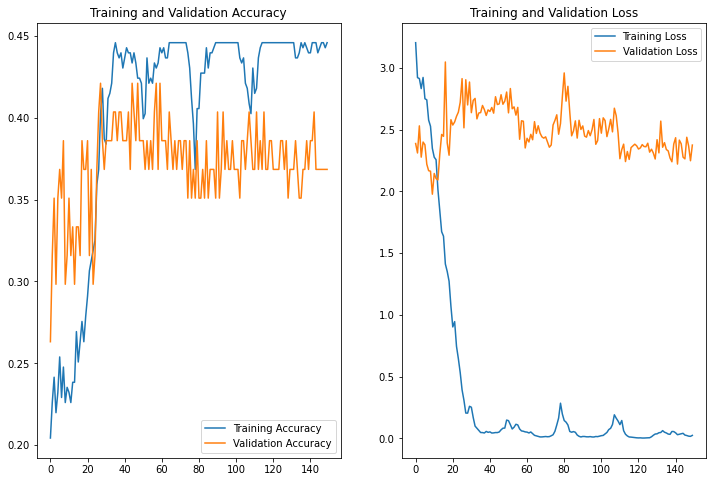

In [228]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predict

In [229]:
#input_shape=(380, 9, 12, 45)
model.predict(lineup[:4,:,:,:])

array([[ 0.76637214],
       [-1.1170849 ],
       [ 1.1278162 ],
       [-2.1756437 ]], dtype=float32)

In [230]:
goals_lbl[:4,0]

array([3, 1, 2, 1])

In [231]:
lineup[5,:,:,17]

array([[0.        , 0.        , 0.84883721, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.36046512, 0.        ],
       [0.29069767, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.61627907, 0.        , 0.8372093 , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.88372093,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.77906977, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.37209302, 0.        ],
       [0.40697674, 0.        , 0.        , 0.        , 0.        ,
        0.81395349, 0.63953488, 0.        , 0.80232558, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.79069767, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.62790698,

In [ ]:
for feat, targ in dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))